In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')


In [3]:
import pandas as pd

matro = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/이어드림강의/2022-04-20(유종훈)/2.Matplotlib/matro.csv", encoding="CP949")

In [4]:
import matplotlib.pyplot as plt


In [5]:
matro

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20200611,중앙선,지평,71,49,20200614
1,20200611,중앙선,용문,1796,1841,20200614
2,20200611,중앙선,원덕,307,298,20200614
3,20200611,중앙선,양평,2475,2462,20200614
4,20200611,중앙선,오빈,293,281,20200614
...,...,...,...,...,...,...
23047,20200504,1호선,종로5가,21289,21855,20200507
23048,20200504,1호선,종로3가,25708,24861,20200507
23049,20200504,1호선,종각,28972,28827,20200507
23050,20200504,1호선,시청,16066,16227,20200507


In [6]:
matro.loc[(slice(None)) , ["역명"] ].values

array([['지평'],
       ['용문'],
       ['원덕'],
       ...,
       ['종각'],
       ['시청'],
       ['서울역']], dtype=object)

In [7]:
matro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23052 entries, 0 to 23051
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    23052 non-null  int64 
 1   호선명     23052 non-null  object
 2   역명      23052 non-null  object
 3   승차총승객수  23052 non-null  int64 
 4   하차총승객수  23052 non-null  int64 
 5   등록일자    23052 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [8]:
cond = matro["역명"] == "강남"
matro.loc[:, [cond]]

KeyError: ignored

In [9]:
matro.columns = [ '사용일자', '호선', '역', '승차', '하차', '등록일자' ]
matro.head()

,사용일자,호선,역,승차,하차,등록일자
0,20200611,중앙선,지평,71,49,20200614
1,20200611,중앙선,용문,1796,1841,20200614
2,20200611,중앙선,원덕,307,298,20200614
3,20200611,중앙선,양평,2475,2462,20200614
4,20200611,중앙선,오빈,293,281,20200614


In [10]:
s = matro[ ["승차",'하차']].mean()
s

승차    9494.281841
하차    9463.415148
dtype: float64

<function matplotlib.pyplot.show>

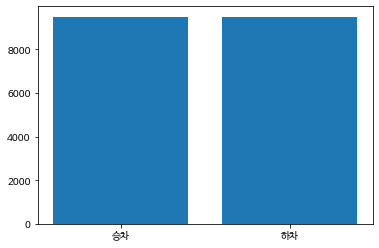

In [11]:
plt.figure()
plt.bar(data=s, x=['승차','하차'], height=s.values)
plt.show

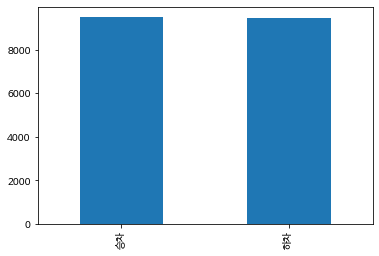

In [12]:
s.plot.bar()

In [20]:
# 호선별 승차인원 총합을 데이터프레임으로 정리하라
# 1호선
cond= matro["호선"] == "1호선"

matro[ cond]["승차"]

580       7869
581      20037
582      15876
583      14593
584      11207
         ...  
23047    21289
23048    25708
23049    28972
23050    16066
23051    36295
Name: 승차, Length: 390, dtype: int64

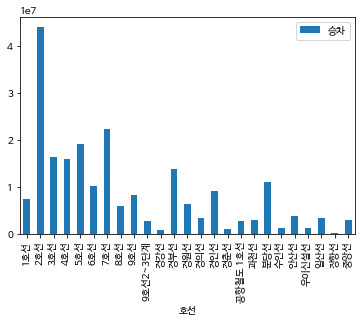

In [30]:
a = matro.groupby("호선").agg({"승차":"sum"})

a.plot.bar()
plt.show()

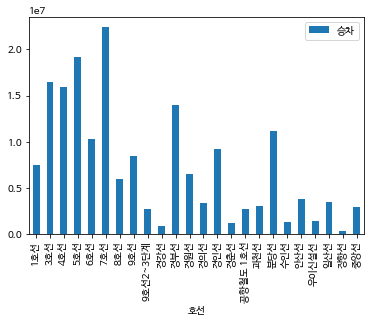

In [31]:
a_=a.drop("2호선")

a_.plot.bar()

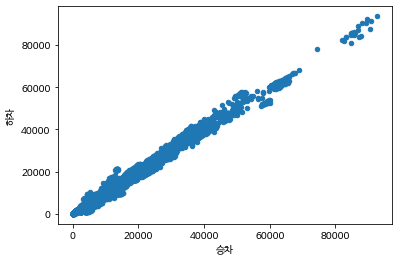

In [32]:
matro.plot.scatter(x="승차",y="하차")